# Linear Regression

In [32]:
# imports for statsmodel
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [33]:
# imports for sklearn
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [34]:
# get credit card data
balance = pd.read_csv('data/balance.csv', index_col=0)
balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Convert Categorical Variables

binary: convert them to numerical 0, 1 <br>
multiple categories: create p-1 number dummy binary variables if too many, consolidate <br>
(other approach: deviation/sum contrasts comparing against mean) <br>
ordered: convert to ordered numerical, works best with LR <br>
(other approach: polynomial coding) <br>

In [35]:
# clean data - convert categorical to codes

# Married - 1, Not Married - 0
balance['Married'] = balance['Married'].map({'Yes': 1, 'No': 0})
# Female - 0, Male - 1
balance['Gender'] = balance['Gender'].map({'Female': 0, ' Male': 1})
# Student Yes - 1, Student No - 0
balance['Student'] = balance['Student'].map({'Yes': 1, 'No': 0})

# Get the Dummy variables
ethnicity_dummy = pd.get_dummies(balance['Ethnicity'])
# Only need two of the three values
balance[['Asian', 'Caucasian']] = ethnicity_dummy[ ['Asian', 'Caucasian'] ]
# Remove the Ethnicity column (adding the pth column will cause multicollinearity)
# vs. one hot encoding used in tree models and nearest neighbors
del balance['Ethnicity']

balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0
3,104.593,7075,514,4,71,11,1,0,0,580,1,0
4,148.924,9504,681,3,36,11,0,0,0,964,1,0
5,55.882,4897,357,2,68,16,1,0,1,331,0,1


## Fit Using Ordinary Least Regression

### Linear Regression Equation explained <br>
$f(x)=\beta_0 + X_1\beta_1 + X_2\beta_2 + ... + X_n\beta_n$ <br>
$Y=\beta_0 + X_1\beta_1 + X_2\beta_2 + ... + X_n\beta_n + \epsilon = \displaystyle\sum_{i=1}^{n} X_i\beta_i$
<br>
$Y$: Y variable, dependent variable, target, outcome, what I'm trying to predict <br>
$X_1...X_n$: X variables, independent variables, features, attributes, what I'm using to predict Y <br>
$\beta_0$: intercept, baseline, where the predicted value of $X=0$<br>
$\beta_1...\beta_n$: slope/regression coefficients, the degree by which each $X$ variable goes up/down for 1 value of $X$ <br>
holding everything else constant <br>
$\epsilon$: error term/residuals, difference between predictions and true y values <br>

In [36]:
# fit linear regression using statsmodel

# determine X variable
X = balance[['Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Asian', 'Caucasian']] 
# (allow for an intercept)
X = sm.add_constant(X)  # We need to manually add a constant, aka intercept, when working with statsmodels
# determine Y variable
y = balance['Balance']

# create a linear regression object
balance_model = sm.OLS(y, X)
balance_results = balance_model.fit()

In [37]:
# fit linear regression using sklearn

# determine X variable
X = balance[['Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Asian', 'Caucasian']] 
# no need for intercept in sklearn
# determine Y variable
y = balance['Balance'] 

# create a linear regression object
lin_model = LinearRegression()
lin_model.fit(X, y)

# lin_model.predict() # predicts
# lin_model.score() # returns R-squared
# lin_model.coef_ # returns beta coefficients
# lin_model.intercept_ # returns beta-knot (intercept)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Fit Training - Testing Sets Using OLS

In [38]:
# now with training-testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# test_size: float between 0 and 1
# random_state: default=None
# if int, random_state is the seed used by the random number generator

In [39]:
# fit linear regression using statsmodel

# create a linear regression object
balance_mod2 = sm.OLS(y_train, X_train)
balance_res2 = balance_mod2.fit()

In [40]:
# fit linear regression training data using sklearn

# create a linear regression object
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

predictions = lin_model.predict(X_test) # predicts on testing set, returning y-hat
# compare against y

In [41]:
# use cross-validated scores to evaluate
from sklearn.model_selection import cross_val_score

# Evaluate

## Overall Metrics

Root Mean Squared Error (RMSE): <br>
$\displaystyle\sum_{i=1}^{n} \sqrt{\frac{(y_i-\hat{y_i})^2}{n}}$ <br>
(difference between true value of y and predicted value of y) / divided by n, then take the square root <br>
always decreases with more faetures! <br>
can be used to compare across models <br>
lower=better <br>
<br>
Residual Standard Error (RSE): <br>
same as RMSE adjusted for degrees of freedom <br>
aka instead of divided by n, divided n-p-1, then take square root <br>
<br>
$R^2$: <br>
coefficient of determination, proportion of variance explained by model, independent of scale of Y <br>
$\displaystyle\sum_{i=1}^{n} (y_i-\hat{y_i})^2$ / $\displaystyle\sum_{i=1}^{n} (y_i-\bar{y_i})^2$ <br>
1 - (distance between true y values and predicted y values / how far each y value is away from the mean of y) <br>
1 - (RSS: residuals sums squared / TSS: total sum squared) <br>
closer to 1=better <br>
always increases with more features! use adjusted $R^2$ to compare models with different features

In [42]:
balance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     815.7
Date:                Wed, 11 Apr 2018   Prob (F-statistic):          5.43e-254
Time:                        14:58:16   Log-Likelihood:                -2401.4
No. Observations:                 400   AIC:                             4825.
Df Residuals:                     389   BIC:                             4869.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -459.4937     33.498    -13.717      0.000    -525.354    -393.634
Income        -7.7682      0.235    -33.049      0.000      -8.230      -7.306
Limit          0.2664      0.004     75.100      0.000       0.259       0.273
Cards         23.2658      3.642      6.388      0.000      16.106      30.426
Age           -0.6079      0.296     -2.056      0.040      -1.189      -0.027
Education     -1.3847      1.602     -0.864      0.388      -4.535       1.765
Gender        10.5465      9.969      1.058      0.291      -9.054      30.147
Student      429.3167     16.744     25.639      0.000     396.396     462.238
Married       -5.9068     10.358     -0.570      0.569     -26.272      14.458
Asian         14.7248     14.169      1.039      0.299     -13.133      42.583
Caucasian      9.8899     12.278      0.806      0.421     -14.249      34.029
==============================================================================
Omnibus:                       39.489   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.373
Skew:                           0.831   Prob(JB):                     3.13e-11
Kurtosis:                       3.374   Cond. No.                     3.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Metrics Continued: Full Model vs. Submodel

F-test compares model with some predictors (submodel/reduced model) to a full model <br>
default=drops all predictors and compares null model to full model (not very helpful) <br>
large F-statistic/low p-value means the dropped parameters are important <br>
ratio of variance left unexplained by reduced model vs. full model <br>

T-test evaluates one variable (F-test for one variable) <br>
t-statistic: significance of each coefficients aka outside the range of what random chance may produce <br>
large t-statistics/low p-value means the $X$ variable is more important <br>

see subset regression for more

## High Bias/Underfitted

### Confounding Variables:
important variable missing

### Nonlinear Relationships

plot partial residuals plot for one variable <br>
fix: many methods, inserting interaction features, or do polynomial or spline regression

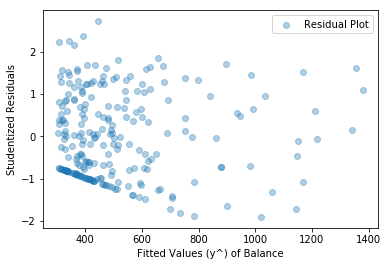

In [43]:
# plot partial residuals plot (for income variable)

# determine X variable
X = balance['Income']
X = sm.add_constant(X)
# determine Y variable
y = balance['Balance'] 

# split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=0)

# fit
balance_mod3 = sm.OLS(y_train2, X_train2)
balance_res3 = balance_mod3.fit()

# plot studentised residuals
student_resids = balance_res3.outlier_test()['student_resid']
y_hats = balance_res3.predict(X_train2)

plt.scatter(y_hats, student_resids, alpha = .35, label='Residual Plot')
plt.legend()
plt.xlabel('Fitted Values (y^) of Balance')
plt.ylabel('Studentized Residuals')
plt.show()

## High Variance/Overfitted

## Plot Studentised Residuals: Outliers, Heteroscedacity

Studentized residuals: errors standardized against real variance <br>
(mean squared error times 1-diagonal elements of the $\hat{y}$ matrix) <br>
shows the number of standard deviations away we are from the regression line <br>
<br>
Detect: non-linear relationships, outliers, heteroscedasticity <br>

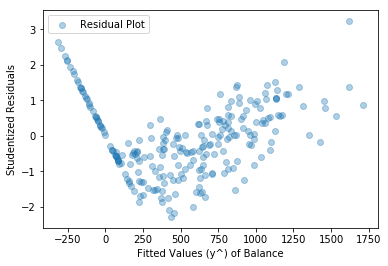

In [44]:
# Plot studentized residuals
student_resids = balance_res2.outlier_test()['student_resid']
y_hats = balance_res2.predict(X_train)

plt.scatter(y_hats, student_resids, alpha = .35, label='Residual Plot')
plt.legend()
plt.xlabel('Fitted Values (y^) of Balance')
plt.ylabel('Studentized Residuals')
plt.show()

### Outliers and Leverage

outliers vs. high leverage points <br>
high leverage points influence the regression line <br>
outliers are not an issue in big data problems, except for anomaly detection <br>
outliers with high leverage are a problem <br>
fix: check if it is bad data? compare regression line w/ or w/o influential point <br>

plot using Cook's distance to see outliers with high leverage <br>
combines standardized residuals, hat-value and cook's distance <br>
cook's distance combines leverage and residual size <br>
size of the bubble shows the value of cook's distance metrics <br>

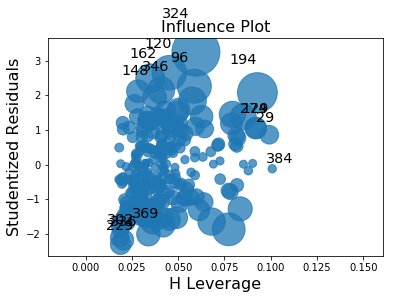

In [47]:
# Plot influence plot with Cook's distance
fig, ax = plt.subplots()
fig = sm.graphics.influence_plot(balance_res2, ax=ax, criterion="cooks")

### Heteroscedasticity

for formal inference to be valid, residuals have to <br>
* be normally distributed and have the same variance (if not, heteroscedasticity) <br>
* be independent (if not, autocollinearity) <br>

heteroskedasticity: errors are greater for some portion of the range <br>
plot errors against normal distribution <br>
fix: transformation of Y <br>

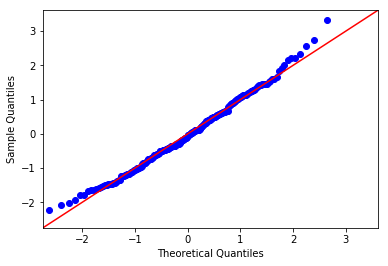

In [24]:
# plot QQ plot
sm.graphics.qqplot(student_resids, line='45', fit=True)
plt.show()

more features, more likely to overfit <br>
fix: decrease number of predictors (subset selection or dimension reduction/PCA) or use penalized regression (see penalized regression)

## Multicollinearity

redundancy among predictors caused by too many variables or interaction between two correlated variables <br>
Plot correlation matrix to look for pairwise correlations <br>
use variation inflation factor for more complicated relationships <br>
fix: remove variables (make note of them), use penalized regression, or create interaction features that capture the interaction of the two variables

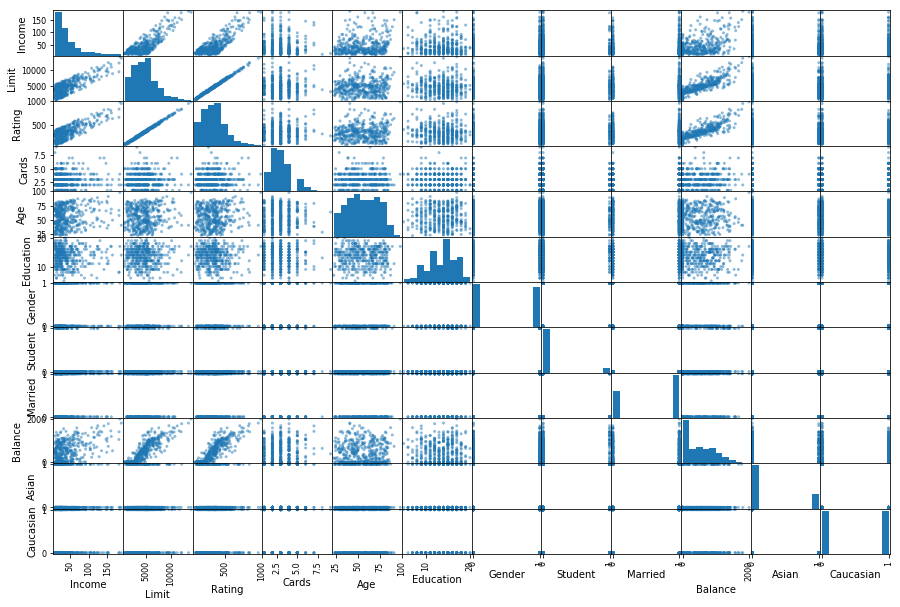

In [6]:
# plot all combinations of variables
pd.plotting.scatter_matrix(balance, figsize=(15, 10))
plt.show()